![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parte 1: Interpolação, Regressão e Derivadas

Vimos que, ao usar interpolação polinomial com pontos igualmente espaçados,
a função fica bem melhor aproximada no centro do intervalo do que nas extremidades.
Nesta parte, veremos como estas técnicas poderiam ser usadas para aproximar as derivadas de uma função.

## Questão 1: Funções básicas

In [2]:
def interp(xs, ys):
    "Retorna os coeficientes do polinomio interpolador para os pontos  (xs, ys)."
    assert(len(xs) == len(ys))
    n = len(xs)
    V = []
    for x in xs:
        v=[]
        for i in range(n):
            v.append(x**i)
        V.append(v)
    return np.linalg.solve(V,ys)

In [3]:
def regress(xs, ys, d):
    "Retorna os coeficientes do polinomio de grau  d  que aproxima, em mínimos quadrados, os pontos  (xs, ys)."
    return np.polyfit(xs,ys, d)

In [4]:
def polyval(coefs, t):
    "Calcula o valor do polinômio com coeficietes  coefs  (dados em ordem crescente) nos pontos  t."
    return np.polyval(np.flip(coefs), t)

In [5]:
assert np.allclose(polyval([1,2], [0,1,2,3]), [1,3,5,7])

In [6]:
assert np.allclose(polyval([1,0,1,2], [0,1,-1,1/2,3]), [1, 4, 0, 3/2, 64])

In [7]:
def derivada(coefs):
    "Retorna a lista dos coeficientes do polinômio que é a derivada do polinômio dados pelos coeficientes  coefs."
    coefs=coefs[1:]
    i=1
    coefs_der=[]
    for x in coefs:
        coefs_der.append(x*i)
        i+=1
    return coefs_der

In [8]:
assert np.allclose(derivada([1,2,3,4,5]), [2,6,12,20])

## Questão 2: Erros de interpolação

Usando pontos igualmente espaçados,
podemos calular um polinômio $p_d$ de grau $d$ que interpola uma função $f$.
Ao derivar este polinômio, obtemos uma aproximação da derivada $f'$.

Vamos estudar como este método funciona para a função seno.

Faça, lado a lado (usando `subplots`),
o gráfico do erro cometido pelo polinômio de interpolação de grau 2 para a função seno no intervalo [0,3],
e o erro resultante de usar a derivada deste polinômio para aproximar a derivada.

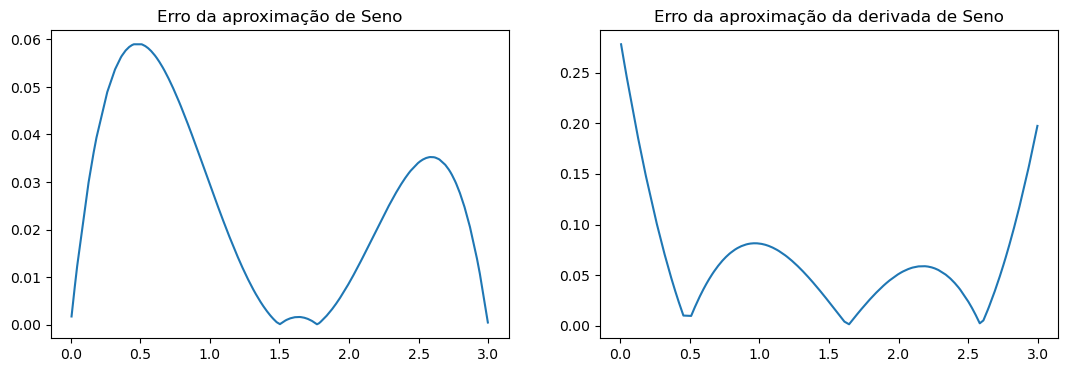

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
x=np.random.uniform(low=0, high=3, size=(200,))
x.sort()
Sen_pts=[np.sin(i) for i in x]
def intervalo(i,f,p):
    return [i + x*(f-i)/(p) for x in range(int(p)+1)]
interv=intervalo(0,3,2)
Coefs=interp(interv,np.sin(interv))
Val=polyval(Coefs,x)
Err_Int=[]
i=0
while i<len(x):
    Err_Int.append(abs(Sen_pts[i]-Val[i]))
    i+=1
Cos_pts=[np.cos(i) for i in x]
Coefs_d=derivada(Coefs)
Val_d=polyval(Coefs_d, x)
Err_d=[]
j=0
while j<len(x):
    Err_d.append(abs(Cos_pts[j]-Val_d[j]))
    j+=1
ax1.plot(x,Err_Int)
ax2.plot(x,Err_d)
ax1.title.set_text("Erro da aproximação de Seno")
ax2.title.set_text("Erro da aproximação da derivada de Seno")

In [10]:
p=4
p == int(p)

True

In [11]:
for ax in fig.axes:
    assert len(ax.get_title()) >= 10

Quem tem mais erro: a aproximação da função ou da derivada?
(Talvez você tenha que ajustar `ylim` para ver melhor o gráfico)

A Aproximação pela derivada tem o erro na escala $10^{-1}$ enquanto a des interpolação possui o erro na escala $10^{-2}$, logo o erro da aproximação da derivada é bem maior que o erro da aproximação por interpolação.

## Questão 3: mais graus!

Faça também para os graus 4, 6 e 8.

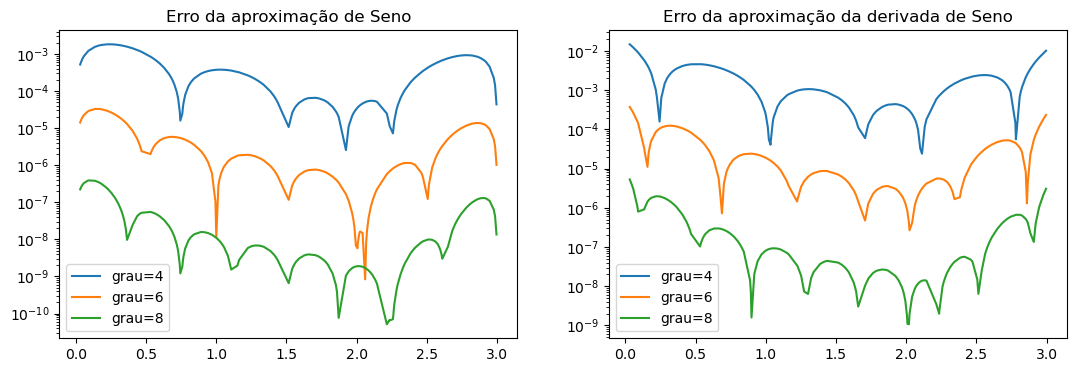

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
x=np.random.uniform(low=0, high=3, size=(200,))
x.sort()
Sen_pts=[np.sin(i) for i in x]
Cos_pts=[np.cos(i) for i in x]
l=[4,6,8]
for w in l:
    interv=intervalo(0,3,w)
    Coefs=interp(interv,np.sin(interv))
    Val=polyval(Coefs, x)
    Err_Int=[]
    i=0
    while i<len(x):
        Err_Int.append(abs(Sen_pts[i]-Val[i]))
        i+=1
    Coefs_d=derivada(Coefs)
    Val_d=polyval(Coefs_d, x)
    Err_d=[]
    j=0
    while j<len(x):
        Err_d.append(abs(Cos_pts[j]-Val_d[j]))
        j+=1
    ax1.semilogy(x,Err_Int,label="grau={}".format(w))
    ax2.semilogy(x,Err_d,label="grau={}".format(w))
    ax1.legend()
    ax2.legend()
ax1.title.set_text("Erro da aproximação de Seno")
ax2.title.set_text("Erro da aproximação da derivada de Seno")
fig = plt.gcf()

In [13]:
assert len(fig.axes) == 2
for ax in fig.axes:
    assert len(ax.lines) == 3

In [14]:
for ax in fig.axes:
    assert len(ax.get_title()) >= 10
    assert len(ax.get_legend().texts) == 3

In [15]:
fig = None

O erro é maior para aproximar a função ou a derivada?  De quanto?

O erro da derivada continua sendo maior, porém, cada vez q o grau do polinomio aumenta o erro diminui na mesma escala que o erro da função.

O erro da aproximação da derivada é maior no centro ou nas extremidades?  Isso é esperado?

O erro é maior nas extremidades. Sim, já que o ajuste do polinomio é feito com pontos espaçados igualmente, o que faz com que nossa função de interpolação faça o ajuste ser "mais fortes" nesses pontos. 

### Outros graus

Faça agora com graus 3, 5, 7 e 9.

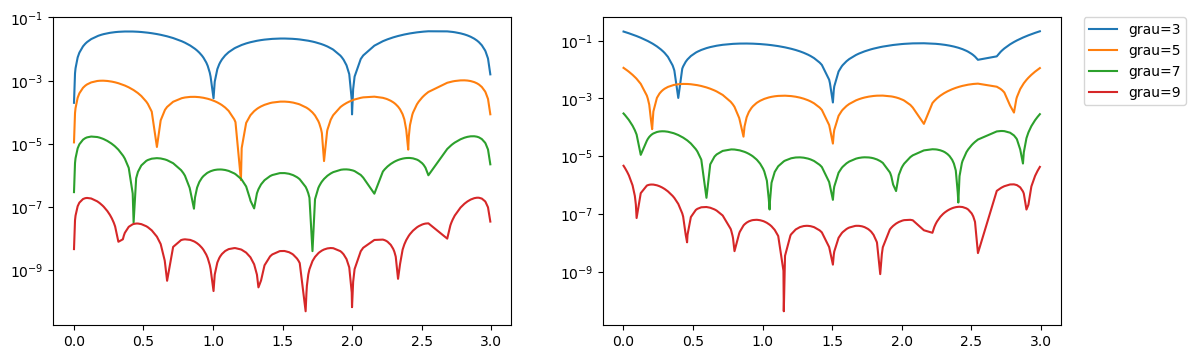

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
x=np.random.uniform(low=0, high=3, size=(200,))
x.sort()
Sen_pts=[np.sin(i) for i in x]
Cos_pts=[np.cos(i) for i in x]
l=[3,5,7,9]
for w in l:
    interv=intervalo(0,3,w)
    Coefs=interp(interv,np.sin(interv))
    Val=polyval(Coefs, x)
    Err_Int=[]
    i=0
    while i<len(x):
        Err_Int.append(abs(Sen_pts[i]-Val[i]))
        i+=1
    Coefs_d=derivada(Coefs)
    Val_d=polyval(Coefs_d, x)
    Err_d=[]
    j=0
    while j<len(x):
        Err_d.append(abs(Cos_pts[j]-Val_d[j]))
        j+=1
    ax1.semilogy(x,Err_Int)
    ax2.semilogy(x,Err_d,label="grau={}".format(w))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
fig = plt.gcf()

In [17]:
assert len(fig.axes) == 2
for ax in fig.axes:
    assert len(ax.lines) == 4

In [18]:
fig = None

Comente as diferenças e similaridades com o caso anterior.
O que você acha que aconteceu?

A diferença mais notavel no grafico é que agora ele possui picos inferiores simetricos devido ao intervalo de interpolação ter uma quantidade impar de ponto entre o primeiro e ultimo ponto.
A variação do erro continua na mesma escala, cada pulo de grau o erro varia $10^{-2}$

## Questão 4: Erros de regressão

Calcule a função seno em 31 pontos igualmente espaçados no intervalo $[0,3]$,
e use-os para ajustar os polinômios de regressão de graus 2, 4, 6 e 8.

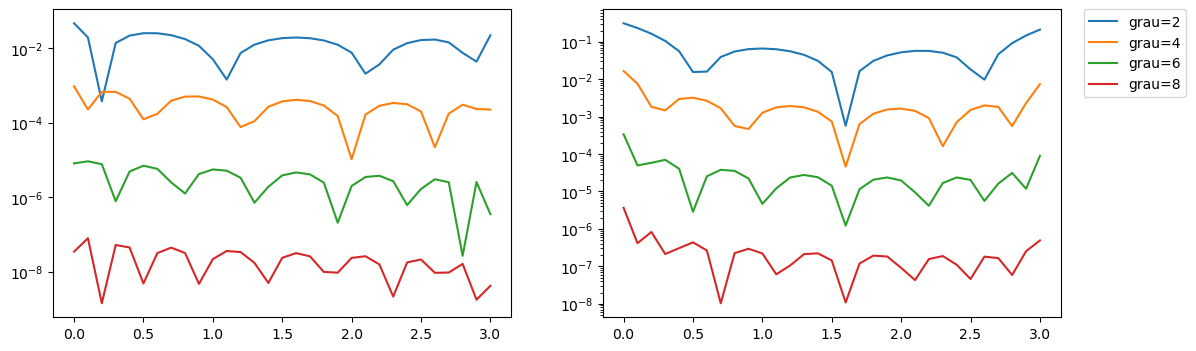

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
x=np.linspace(0,3,31)
Sen_pts=[np.sin(i) for i in x]
Cos_pts=[np.cos(i) for i in x]
l=[2,4,6,8]
for w in l:
    Coefs=regress(x,np.sin(x),w)
    Val=polyval(np.flip(Coefs), x)
    Err_Int=[]
    i=0
    while i<len(x):
        Err_Int.append(abs(Sen_pts[i]-Val[i]))
        i+=1
    Coefs_d=derivada(np.flip(Coefs))
    Val_d=polyval(Coefs_d, x)
    Err_d=[]
    j=0
    while j<len(x):
        Err_d.append(abs(Cos_pts[j]-Val_d[j]))
        j+=1
    ax1.semilogy(x,Err_Int)
    ax2.semilogy(x,Err_d,label="grau={}".format(w))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
fig = plt.gcf()

In [20]:
assert len(fig.axes) == 2
for ax in fig.axes:
    assert len(ax.lines) == 4

Compare os erros de ajuste da função (seno), entre este método e o uso dos polinômios interpoladores.

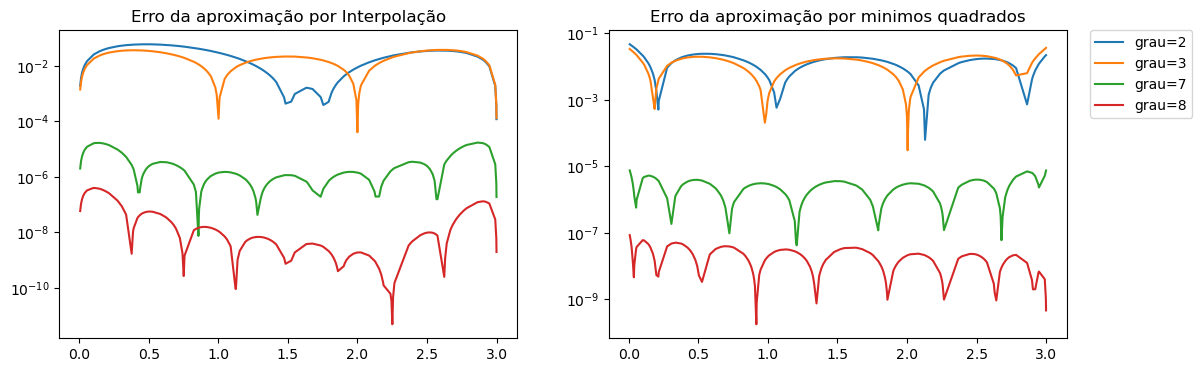

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
x=np.random.uniform(low=0, high=3, size=(200,))
x.sort()
Sen_pts=[np.sin(i) for i in x]
l=[2,3,7,8]
for w in l:
    interv=intervalo(0,3,w)
    Coefs_Int=interp(interv,np.sin(interv))
    Val_Int=polyval(Coefs_Int, x)
    Err_Int=[]
    i=0
    while i<len(x):
        Err_Int.append(abs(Sen_pts[i]-Val_Int[i]))
        i+=1
    Coefs_Las=regress(x,np.sin(x),w)
    Val_Las=polyval(np.flip(Coefs_Las), x)
    Err_Las=[]
    j=0
    while j<len(x):
        Err_Las.append(abs(Sen_pts[j]-Val_Las[j]))
        j+=1
    ax1.semilogy(x,Err_Int,)
    ax2.semilogy(x,Err_Las,label="grau={}".format(w))
    ax1.title.set_text("Erro da aproximação por Interpolação")
    ax2.title.set_text("Erro da aproximação por minimos quadrados")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Podemos ver que ambos os metodos possuem erros em mesma magnitude, porém para graus pequenos o erro da aproximação por minimos quadrados possue mais picos picos inferiores, mas no geral, as duas aproximações são muito parecidas

Compare os erros de ajuste das derivadas.

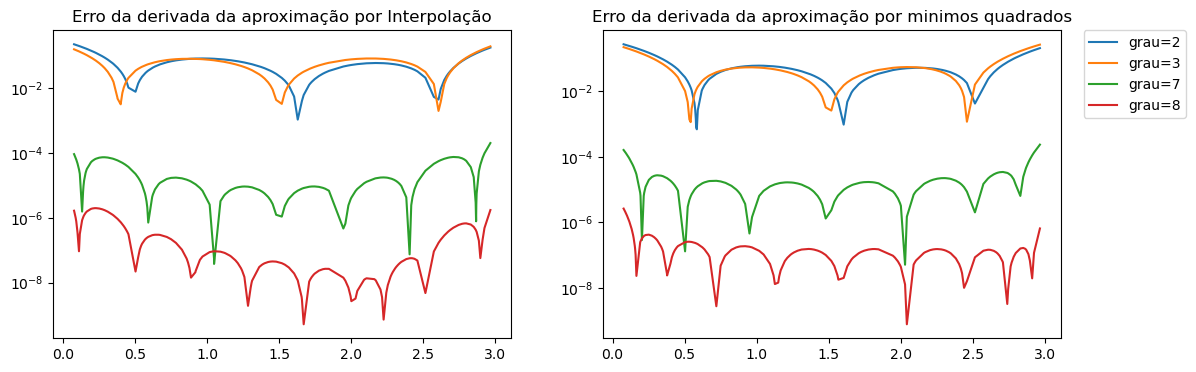

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
x=np.random.uniform(low=0, high=3, size=(200,))
x.sort()
Cos_pts=[np.cos(i) for i in x]
l=[2,3,7,8]
for w in l:
    interv=intervalo(0,3,w)
    Coefs_Int=interp(interv,np.sin(interv))
    Coefs_Int_d=derivada(Coefs_Int)
    Val_Int_d=polyval(Coefs_Int_d, x)
    Err_Int_d=[]
    i=0
    while i<len(x):
        Err_Int_d.append(abs(Cos_pts[i]-Val_Int_d[i]))
        i+=1
    Coefs_Las=regress(x,np.sin(x),w)
    Coefs_Las_d=derivada(np.flip(Coefs_Las))
    Val_Las_d=polyval(Coefs_Las_d, x)
    Err_Las_d=[]
    j=0
    while j<len(x):
        Err_Las_d.append(abs(Cos_pts[j]-Val_Las_d[j]))
        j+=1
    ax1.semilogy(x,Err_Int_d)
    ax2.semilogy(x,Err_Las_d,label="grau={}".format(w))
    ax1.title.set_text("Erro da derivada da aproximação por Interpolação")
    ax2.title.set_text("Erro da derivada da aproximação por minimos quadrados")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Acontece algo semelhante a questão acima.



## Questão 5: Derivadas centrais

Qual seria o tamanho do passo necessário para calcular uma aproximação da derivada usando a derivada central,
de forma a obter um erro comparável com ajuste do polinômio de grau 2? E de grau 4?

Faça os cálculos abaixo, indicando **como você chegou nestes valores**.

Vamos observar o Erro entre os valores obtidos usando a função da derivada e usando a derivada central para ccalcular os pontos:

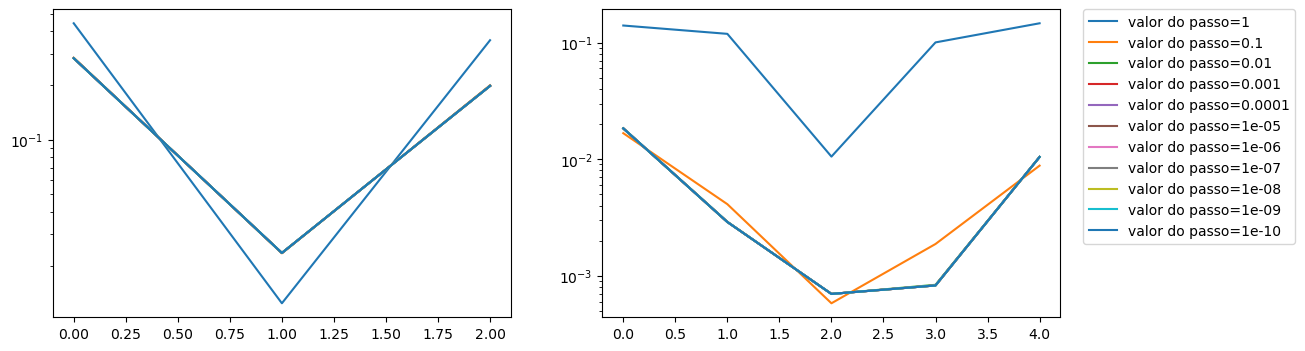

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
def df_central(f,x,h=1e-5):
    return (f(x+h)-f(x-h))/(2*h)
h=[1,1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10]
interv=intervalo(0,3,2)
interv1=intervalo(0,3,4)
for z in h:
    Coefs=interp(interv,np.sin(interv))
    Coefs_d=derivada(Coefs)
    Val_d=polyval(Coefs_d, interv)
    l=[]
    for n in interv:
        l.append(df_central(np.sin,n,z))
    Coefs_df=interp(interv,l)
    Val_df=polyval(Coefs_df, interv)
    Err=[]
    i=0
    while i<len(interv):
        Err.append(abs(Val_d[i]-Val_df[i]))
        i+=1
    ax1.semilogy(Err)
for z in h:
    Coefs=interp(interv1,np.sin(interv1))
    Coefs_d=derivada(Coefs)
    Val_d=polyval(Coefs_d, interv1)
    l=[]
    for n in interv1:
        l.append(df_central(np.sin,n,z))
    Coefs_df=interp(interv1,l)
    Val_df=polyval(Coefs_df, interv1)
    Err1=[]
    i=0
    while i<len(interv1):
        Err1.append(abs(Val_d[i]-Val_df[i]))
        i+=1
    ax2.semilogy(Err1,label="valor do passo={}".format(z))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Podemos ver pelo grafico acima que o valor do passo de $0.1$ até $10^{-9}$ possui o mesmo erro, e para o passo = $10^{-10}$ quando o grau do polinomio é 4 o erro se torna ainda menor para certos pontos, podemos definir h igual a $10^{-5}$ para termos uma boa base de calculo, porém seria necessario plotar graficos com graus maiores para termos uma respostar melhor.

Agora, faça o ajuste dos polinômios de grau 12, 14 e 16, por interpolação, no intervalo $[0,3]$.

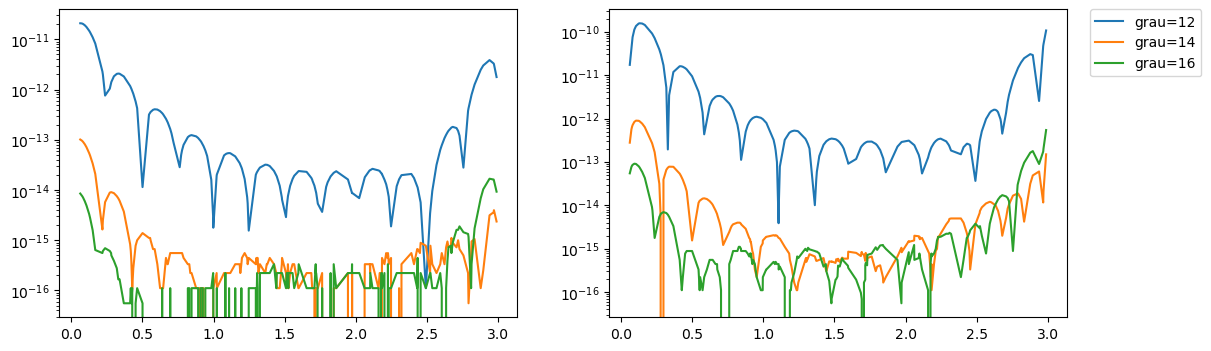

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
x=np.random.uniform(low=0, high=3, size=(200,))
x.sort()
Sen_pts=[np.sin(i) for i in x]
Cos_pts=[np.cos(i) for i in x]
l=[12,14,16]
for w in l:
    interv=intervalo(0,3,w)
    Coefs=interp(interv,np.sin(interv))
    Val=polyval(Coefs, x)
    Err_Int=[]
    i=0
    while i<len(x):
        Err_Int.append(abs(Sen_pts[i]-Val[i]))
        i+=1
    Coefs_d=derivada(Coefs)
    Val_d=polyval(Coefs_d, x)
    Err_d=[]
    j=0
    while j<len(x):
        Err_d.append(abs(Cos_pts[j]-Val_d[j]))
        j+=1
    ax1.semilogy(x,Err_Int)
    ax2.semilogy(x,Err_d,label="grau={}".format(w))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
fig = plt.gcf()

Qual a magnitude do erro que você obtém para a derivada, no intervalo $[0,3]$?

O grafico nos mostra:

para grau 12 temos a magnitude do erro = $10^{-10}$

para grau 14 temos a magnitude do erro = $10^{-12}$

para grau 16 temos a magnitude do erro = $10^{-14}$ 

Aparentemente a magnitude do erro aumenta de forma escala: $10^{-2}$ para cada +2 valor no grau do polinomio

Qual seria o passo no método das derivadas centrais para obter esse erro?

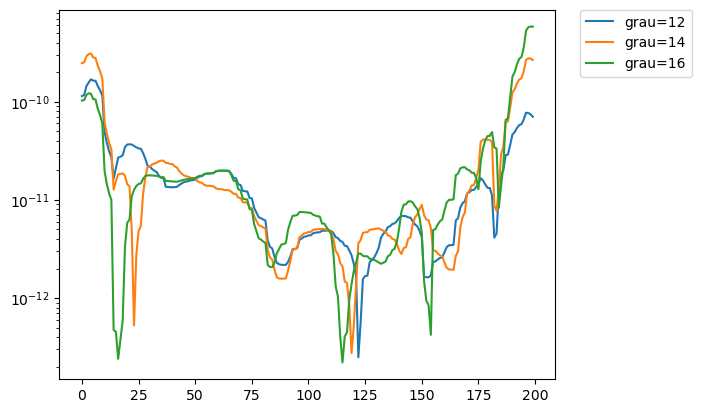

In [25]:
x=np.random.uniform(low=0, high=3, size=(200,))
x.sort()
Cos_pts=[np.cos(i) for i in x]
l=[12,14,16]
for w in l:
    interv=intervalo(0,3,w)
    Coefs=interp(interv,np.sin(interv))
    l=[]
    for n in interv:
        l.append(df_central(np.sin,n,1e-5))
    Coefs_df=interp(interv,l)
    Val_df=polyval(Coefs_df, x)
    Err=[]
    j=0
    while j<len(x):
        Err.append(abs(Cos_pts[j]-Val_df[j]))
        j+=1
    plt.semilogy(Err,label="grau={}".format(w))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
fig = plt.gcf()

Comente

Podemos observar que com o passo = $10^{-5}$ o erro fica na escala de $10^{-10}$ se diminuirmos o erro fica constante e numa escala bem alta e se aumentarmos o passo o erro tende a atingir valores numa escala mais ampla, então nossa melhor escolha é o passo igual a $10^{-5}$

# Parte 2: Interpolação com derivadas

Suponha que, além dos valores $y_i = f(x_i)$, também possuímos $z_i = f'(x_i)$.
Deveríamos ser capazes de calcular melhores polinômios interpoladores!

## Questão 6: Equações

Suponha que são dados apenas 2 pontos.
- Quais equações os coeficientes do polinômio devem satisfazer?
- Qual o grau deste polinômio?
- A matriz deste sistema é inversível?

Dado os pontos da função $f(x_i)$ sendo $f(x_1)=a_nx_1^n+...+a_1x_1+a_0$ e $f(x_2)=a_nx_2^n+...+a_1x_2+a_0$
e suas derivadas sendo $f'(x_1)=a_nx_1^{n-1}+...+a_2x_1+a_1$ e $f'(x_2)=a_nx_2^{n-1}+...+a_2x_2+a_1$

Para criarmos uma função de interpolação precisamos montar uma matriz com os valores de $x_n$ e multiplicar pelos coeficientes de $f(x_1)$, $f(x_2)$, $f'(x_1)$ e $f'(x_2)$ e igualar aos valores $y_1$, $y_2$, $z_1$ e $z_2$. 

Como a matriz dos resultados possue 4 valores precisamos que $f(x_n)$ tenha apenaas 4 coeficientes, e para uma função da forma $f(x_n)=a_nx_n^n+...+a_1x_n+a_0$ tenha 4 coeficientes temos q reduzir a uma função do terceiro grau: $f(x_n)=a_3x_n^3+a_2x_n^2+a_1x_n+a_0$.

Montando o problema, temos:

$\begin{bmatrix} 
    1 & x_1 & x_1^2 & x_1^3 \\
    1 & x_2 & x_2^2 & x_2^3 \\ 
    0 &  1  & x_1 & x_1^2 \\
    0 &  1  & x_2 & x_2^2 \\
\end{bmatrix}$ $\begin{bmatrix}a_0 \\ a_1 \\ a_2 \\ a_3 \end{bmatrix}$ = $\begin{bmatrix}y_1 \\ y_2 \\ z_1 \\ z_2 \end{bmatrix}$

Para a matriz ser inversível precisamos que seu determinante seja diferente de zero, o que claramente é verdade.

No caso geral, quais são as novas equações que os coeficientes $p_i$ devem satisfazer?

Dado $x$ pontos de $f(x_i)$ com suas respectivas derivada, $p_i$ deve possuir $2x$ elementos, para q a matriz seja quadrado e seja possivel interpolar

Escreva a função `matrix_der(xs,d)` que calcula a matriz que multiplica estes coeficientes,
(nas novas equações)
em função dos pontos `xs` onde sabemos as derivadas e do grau `d` que o polinômio terá.

(Essa função é análoga à função que constrói a matriz para a interpolação e regressão)

In [26]:
def matrix_der(xs, d):
    xs = np.asarray(xs, dtype=float)
    ans=[]
    ans.append([[0]] * len(xs))
    ans.append(np.array([i*np.power(xs,i-1) for i in range(1, d+1)]).transpose())
    return np.concatenate(ans, axis=1)

In [27]:
M1 = matrix_der([1,2,3], 3)
ans = [[ 0.,  1.,  2.,  3.],
       [ 0.,  1.,  4., 12.],
       [ 0.,  1.,  6., 27.]]
assert np.allclose(M1, ans)

In [28]:
M1 = matrix_der([1,2,3,4,5], 3)
assert np.shape(M1) == (5,4)

In [29]:
M1 = matrix_der([1,2,3,4,5], 8)
assert np.shape(M1) == (5,9)

## Questão 7: Resolvendo o sistema

Para construir matrizes e vetores em "blocos", você pode usar `np.hstack`, `np.vstack` e/ou `np.block`.

In [30]:
def interp1(xs, ys, zs):
    "Retorna os coeficientes do polinomio interpolador para os pontos  (xs, ys), com respectivas derivadas zs."
    vander=np.array([[xs[v % len(xs)] ** i for i in range(len(xs)*2)] for v in range(len(xs))])
    dxs=matrix_der(xs, 2*len(xs) - 1)
    coefs = np.concatenate((vander,dxs), axis=0)
    ans = np.concatenate((np.array(ys), np.array(zs)), axis=0)
    return np.linalg.solve(coefs, ans)

In [31]:
coefs = interp1([0], [1], [1])
assert np.allclose(coefs, [1,1])

In [32]:
coefs = interp1([1], [1], [1])
assert np.allclose(coefs, [0,1])

Explique a resposta dos dois `assert`s acima (analiticamente)

Seguindo o principio da questão anterior, nossa função monta uma matriz e resolve o sistema.

No primeiro assert temos a seguinte matriz:

$\begin{bmatrix} 1 & 0 \\ 0 & 1  \end{bmatrix}$ $\begin{bmatrix}a_0 \\ a_1 \end{bmatrix}$ = $\begin{bmatrix} 1 \\ 1 \end{bmatrix}$ 

E o segundo assert tem a seguinte matriz: 

$\begin{bmatrix} 1 & 1 \\ 0 & 1  \end{bmatrix}$ $\begin{bmatrix}a_0 \\ a_1 \end{bmatrix}$ = $\begin{bmatrix} 1 \\ 1 \end{bmatrix}$ 

In [33]:
coefs = interp1([0,1], [1,1], [1,1])
assert np.allclose(coefs, [1,1,-3,2])

In [34]:
xs = np.array([0,1.0])
ys = np.array([1,3.0])
zs = np.array([1,1.0])
coefs = interp1(xs, ys, zs)
assert np.allclose(coefs, [1,1,3,-2])

Explique porque os coeficientes de grau 0 e 1 são os mesmos de só fazer a interpolação no zero.

montando a matriz de interpolação para achar os coeficientes de grau 0 e 1 temos:

$\begin{bmatrix} 1 & x_n \\ 0 & 1  \end{bmatrix}$ $\begin{bmatrix}a_0 \\ a_1 \end{bmatrix}$ = $\begin{bmatrix} y_n \\ z_n \end{bmatrix}$ 

Se $x_n$ é igual a 0, temos uma matriz Identidade, logo $a_0=y_n$ e $a_1=z_n$

## Questão 8: Erro

O erro decai conforme aumentamos o número de pontos?
Teste para as funções $f(x) = \cos(x)$ e $g(x) = e^x$ no intervalo $[-1, 2]$.

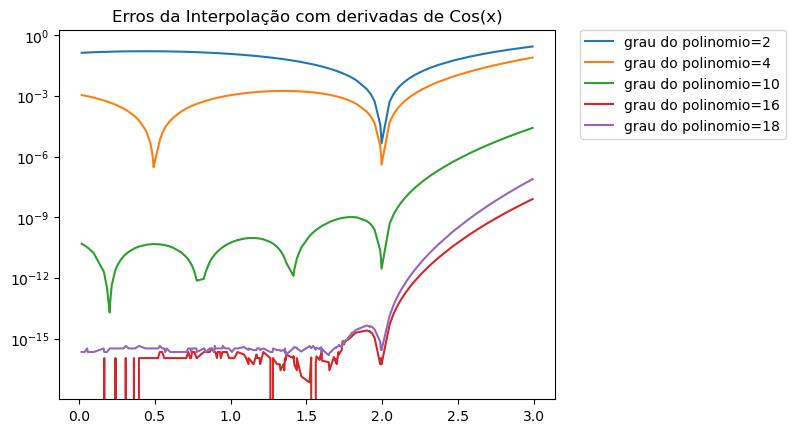

In [35]:
# Gráficos de erro para o cosseno
x=np.random.uniform(low=0, high=3, size=(200,))
x.sort()
Cos_pts=[np.cos(i) for i in x]
l=[1,2,5,8,9]
for w in l:
    interv=intervalo(-1,2,w)
    Coefs=interp1(interv,np.cos(interv),-np.sin(interv))
    Val=polyval(Coefs, x)
    Err=[]
    i=0
    while i<len(x):
        Err.append(abs(Cos_pts[i]-Val[i]))
        i+=1
    plt.semilogy(x,Err,label="grau do polinomio={}".format(2*w))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.title("Erros da Interpolação com derivadas de Cos(x)")
ax = plt.gca()

In [36]:
assert len(ax.get_title()) >= 10
assert len(ax.lines) >= 5

In [37]:
ax = None

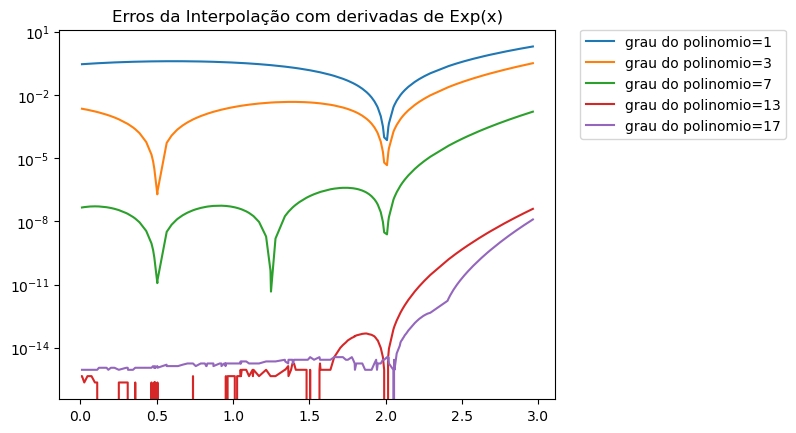

In [38]:
# Gráficos de erro para a função exponencial
x=np.random.uniform(low=0, high=3, size=(200,))
x.sort()
Exp_pts=[np.exp(i) for i in x]
l=[1,2,4,7,9]
for w in l:
    interv=intervalo(-1,2,w)
    Coefs=interp1(interv,np.exp(interv),np.exp(interv))
    Val=polyval(Coefs, x)
    Err=[]
    i=0
    while i<len(x):
        Err.append(abs(Exp_pts[i]-Val[i]))
        i+=1
    plt.semilogy(x,Err,label="grau do polinomio={}".format(2*w-1))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.title("Erros da Interpolação com derivadas de Exp(x)")
    ax = plt.gca()
ax = plt.gca()

In [39]:
assert len(ax.get_title()) >= 10
assert len(ax.lines) >= 5

## Questão 9: Comparando

Há duas formas de obter um polinômio de grau 9 para interpolar a função cosseno:
- calcular a função em 10 pontos igualmente espaçados;
- calcular a função e sua derivada em 5 pontos igualmente espaçados.

Faça um gráfico dos erros, no interalo $[-1,2]$, para cada um destes polinômios.

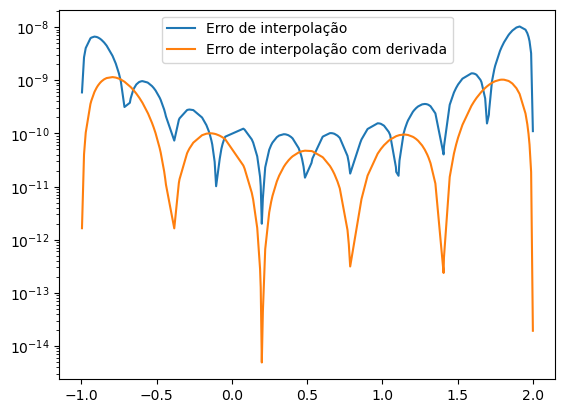

In [40]:
x=np.random.uniform(low=-1, high=2, size=(200,))
x.sort()
Cos_pts=[np.cos(i) for i in x]
interv=intervalo(-1,2,10)
Coefs=interp(interv,np.cos(interv))
Val=polyval(Coefs, x)
Err=[]
i=0
Err_M=0
while i<len(x):
    Err.append(abs(Cos_pts[i]-Val[i]))
    Err_M+=abs(Cos_pts[i]-Val[i])
    i+=1
interv1=intervalo(-1,2,5)
Coefs1=interp1(interv1,np.cos(interv1),-np.sin(interv1))
Val1=polyval(Coefs1, x)
Err1=[]
Err1_M=0
j=0
while j<len(x):
    Err1.append(abs(Cos_pts[j]-Val1[j]))
    Err1_M+=abs(Cos_pts[j]-Val1[j])
    j+=1
plt.semilogy(x,Err,label="Erro de interpolação")
plt.semilogy(x,Err1,label="Erro de interpolação com derivada")
plt.legend()

Para termos uma medida quantitativa,
calcule a soma dos valores absolutos dos erros,
para vários pontos ao longo do intervalo $[-1,2]$

In [41]:
print("Soma dos erros da aproximação polinomial: {}".format(Err_M))
print("Soma dos erros da aproximação polinomial com derivada: {}".format(Err1_M))

Soma dos erros da aproximação polinomial: 2.519805697084876e-07
Soma dos erros da aproximação polinomial com derivada: 5.110575847927512e-08


Faça o mesmo estudo para polinômios de grau 7, 11 e 15.

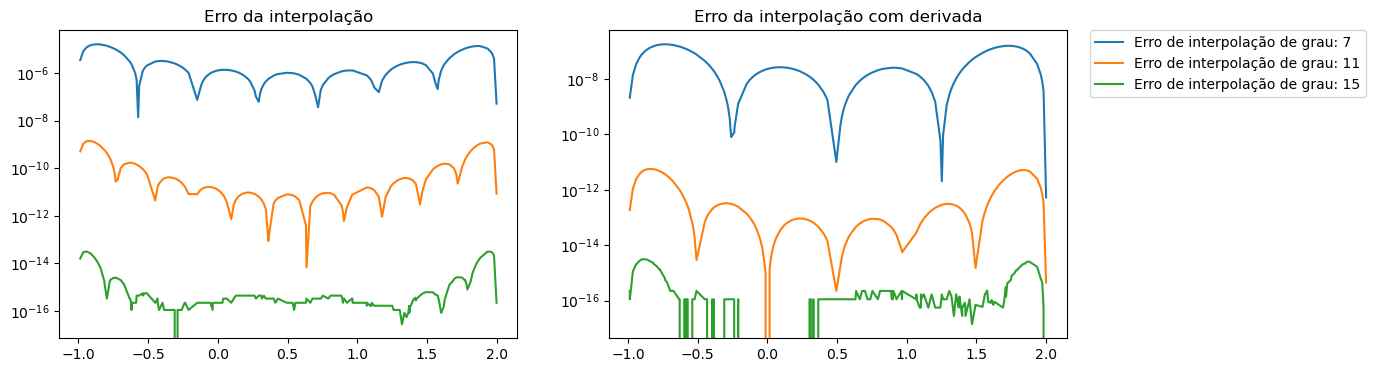

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
x=np.random.uniform(low=-1, high=2, size=(200,))
x.sort()
Cos_pts=[np.cos(i) for i in x]
l=[7,11,15]
for z in l:
    interv=intervalo(-1,2,z)
    Coefs=interp(interv,np.cos(interv))
    Val=polyval(Coefs, x)
    Err=[]
    i=0
    while i<len(x):
        Err.append(abs(Cos_pts[i]-Val[i]))
        i+=1
    ax1.semilogy(x,Err)
l1=[4,6,8]
for w in l1:
    interv1=intervalo(-1,2,w)
    Coefs1=interp1(interv1,np.cos(interv1),-np.sin(interv1))
    Val1=polyval(Coefs1, x)
    Err1=[]
    j=0
    while j<len(x):
        Err1.append(abs(Cos_pts[j]-Val1[j]))
        j+=1
    ax2.semilogy(x,Err1,label="Erro de interpolação de grau: {}".format(2*w-1))
ax1.title.set_text("Erro da interpolação")
ax2.title.set_text("Erro da interpolação com derivada")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

O que você observa?

Que o Erro da interpolação com a derivada é de grau $10^{-2}$ menor que o da interpolação normal, fora que a interpolação com derivada possui metade do picos inferiores em relação a interpolação sem derivada

Refaça para a função exponencial, com vários graus.

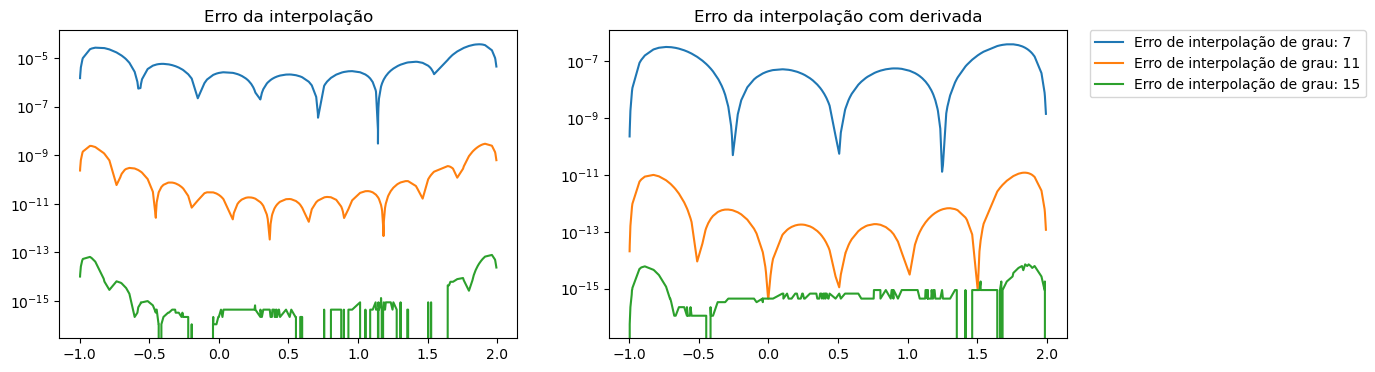

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
x=np.random.uniform(low=-1, high=2, size=(200,))
x.sort()
Exp_pts=[np.exp(i) for i in x]
l=[7,11,15]
for z in l:
    interv=intervalo(-1,2,z)
    Coefs=interp(interv,np.exp(interv))
    Val=polyval(Coefs, x)
    Err=[]
    i=0
    while i<len(x):
        Err.append(abs(Exp_pts[i]-Val[i]))
        i+=1
    ax1.semilogy(x,Err)
l1=[4,6,8]
for w in l1:
    interv1=intervalo(-1,2,w)
    Coefs1=interp1(interv1,np.exp(interv1),np.exp(interv1))
    Val1=polyval(Coefs1, x)
    Err1=[]
    j=0
    while j<len(x):
        Err1.append(abs(Exp_pts[j]-Val1[j]))
        j+=1
    ax2.semilogy(x,Err1,label="Erro de interpolação de grau: {}".format(2*w-1))
ax1.title.set_text("Erro da interpolação")
ax2.title.set_text("Erro da interpolação com derivada")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

O que você viu no caso do cosseno se mantém aqui?
Porque você acha que isso aconteceu?

Sim. como ambas as funções são de grau $C^{\infty}$, temos um polinomio que pode aproximar elas precisamente, ou seja, a função de interpolação vai assumindo valores relativos a essa aproximação e tornando a função cada vez mais precisa 